In [1]:
import pandas as pd
import pymysql
import sqlalchemy
from sqlalchemy.types import Integer
from sqlalchemy.types import String

In [2]:
# Here are function to rename columns n excel file
def rename(dataframe):
    col=['Date','Ref','Ab_change','Rel_change','Close','Vol','Open','High','Low','Agreement','For_sell','For_buy','For_net']
    df.columns = df.iloc[0,:]
    df.drop(index=0,inplace=True)
    df.drop(columns=[0,'STT'],inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.columns = col

In [109]:
# Change all digit to number function
def thousand_handle(ar):
    if type(ar) == str:
        if '%' in ar:
            ar = ar.replace('%','')
            ar= ar.replace(',','')
            ar = ar.replace('.','')
            ar = int(ar)/10000
        else:
            ar= ar.replace(',','')
            ar = ar.replace('.','')
            ar = int(ar)
    return ar

In [110]:
# Import data:
stock = 'AAA'
df = pd.read_csv('./All_prices/%s.csv'%stock)

In [ ]:
rename(df)

In [37]:
# Create passing argument to create sql table:

col=['Date','Ref','Ab_change','Rel_change','Close','Vol','Open','High','Low','Agreement','For_sell','For_buy','For_net']
passing = col.copy()
passing.insert(0,stock)
passing = tuple(passing)
print(passing)

('BBB', 'Date', 'Ref', 'Ab_change', 'Rel_change', 'Close', 'Vol', 'Open', 'High', 'Low', 'Agreement', 'For_sell', 'For_buy', 'For_net')


# ---------------------------------------- WORK WITH SQL ------------------------------------------

## First idea is that we will use df.to_sql, but it raises error 
```python 
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in execute(self, *args, **kwargs)
   1585         try:
-> 1586             cur.execute(*args, **kwargs)
   1587             return cur

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\cursors.py in execute(self, query, args)
    145 
--> 146         query = self.mogrify(query, args)
    147 

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\cursors.py in mogrify(self, query, args)
    124         if args is not None:
--> 125             query = query % self._escape_args(args, conn)
    126 

TypeError: not all arguments converted during string formatting

During handling of the above exception, another exception occurred:

InterfaceError                            Traceback (most recent call last)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in execute(self, *args, **kwargs)
   1589             try:
-> 1590                 self.con.rollback()
   1591             except Exception as inner_exc:  # pragma: no cover

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\connections.py in rollback(self)
    478         """
--> 479         self._execute_command(COMMAND.COM_QUERY, "ROLLBACK")
    480         self._read_ok_packet()

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\connections.py in _execute_command(self, command, sql)
    792         if not self._sock:
--> 793             raise err.InterfaceError(0, "")
    794 

InterfaceError: (0, '')

The above exception was the direct cause of the following exception:

DatabaseError                             Traceback (most recent call last)
<ipython-input-128-dabca4163498> in <module>
----> 1 df.to_sql(name=stock,con=connection,index=False)
      2 
      3 # Error here!

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py in to_sql(self, name, con, schema, if_exists, index, index_label, chunksize, dtype, method)
   2651         from pandas.io import sql
   2652 
-> 2653         sql.to_sql(
   2654             self,
   2655             name,

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in to_sql(frame, name, con, schema, if_exists, index, index_label, chunksize, dtype, method)
    510         )
    511 
--> 512     pandas_sql.to_sql(
    513         frame,
    514         name,

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in to_sql(self, frame, name, if_exists, index, index_label, schema, chunksize, dtype, method)
   1731             dtype=dtype,
   1732         )
-> 1733         table.create()
   1734         table.insert(chunksize, method)
   1735 

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in create(self)
    642 
    643     def create(self):
--> 644         if self.exists():
    645             if self.if_exists == "fail":
    646                 raise ValueError(f"Table '{self.name}' already exists.")

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in exists(self)
    629 
    630     def exists(self):
--> 631         return self.pd_sql.has_table(self.name, self.schema)
    632 
    633     def sql_schema(self):

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in has_table(self, name, schema)
   1742         query = f"SELECT name FROM sqlite_master WHERE type='table' AND name={wld};"
   1743 
-> 1744         return len(self.execute(query, [name]).fetchall()) > 0
   1745 
   1746     def get_table(self, table_name, schema=None):

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\io\sql.py in execute(self, *args, **kwargs)
   1593                     f"Execution failed on sql: {args[0]}\n{exc}\nunable to rollback"
   1594                 )
-> 1595                 raise ex from inner_exc
   1596 
   1597             ex = DatabaseError(f"Execution failed on sql '{args[0]}': {exc}")

DatabaseError: Execution failed on sql: SELECT name FROM sqlite_master WHERE type='table' AND name=?;
not all arguments converted during string formatting
unable to rollback


```

In [128]:
df.to_sql(name=stock,con=connection,index=False)

# Error here!

DatabaseError: Execution failed on sql: SELECT name FROM sqlite_master WHERE type='table' AND name=?;
not all arguments converted during string formatting
unable to rollback

In [ ]:
# engine = sqlalchemy.create_engine('mysql+pymysql://root:Password1@@localhost:3306/test_db')
# with engine.connect() as conn:
#     print('sqla:', list(conn.execute('select * from aaa')))
#     df = pd.read_sql('select * from users', conn)
#     print('df:', df)
#     df.to_sql('users2', conn)

In [23]:
# Create connection
connection = pymysql.connect(host='localhost',
                            user = 'root',
                            password = 'Password1@',database='test_db'
                            ,cursorclass=pymysql.cursors.DictCursor)

## The next idea is that create table then insert data into table by cursor.execute(). But it still raises error

```python 
---------------------------------------------------------------------------
InterfaceError                            Traceback (most recent call last)
<ipython-input-125-bb143efaa6f4> in <module>
      3 # Create a new record
      4 sql = """INSERT INTO test_db.bbb VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
----> 5 mycursor.execute(sql, tuple(df[4:5].values[0]))
      6 
      7 connection.commit()

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\cursors.py in execute(self, query, args)
    146         query = self.mogrify(query, args)
    147 
--> 148         result = self._query(query)
    149         self._executed = query
    150         return result

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\cursors.py in _query(self, q)
    308         self._last_executed = q
    309         self._clear_result()
--> 310         conn.query(q)
    311         self._do_get_result()
    312         return self.rowcount

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\connections.py in query(self, sql, unbuffered)
    545         if isinstance(sql, str):
    546             sql = sql.encode(self.encoding, "surrogateescape")
--> 547         self._execute_command(COMMAND.COM_QUERY, sql)
    548         self._affected_rows = self._read_query_result(unbuffered=unbuffered)
    549         return self._affected_rows

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pymysql\connections.py in _execute_command(self, command, sql)
    791         """
    792         if not self._sock:
--> 793             raise err.InterfaceError(0, "")
    794 
    795         # If the last query was unbuffered, make sure it finishes before

InterfaceError: (0, '')```

In [52]:
# Create cursor
mycursor = connection.cursor()

# Create table by cursor
mycursor.execute("""CREATE TABLE %s 
                (%s VARCHAR(100), %s VARCHAR(255),
                %s VARCHAR(255), %s VARCHAR(255),
                %s VARCHAR(255), %s VARCHAR(255), 
                %s VARCHAR(255), %s VARCHAR(255),
                %s VARCHAR(255), %s VARCHAR(255),
                %s VARCHAR(255), %s VARCHAR(255),
                %s VARCHAR(255))""" %(passing))

InterfaceError: (0, '')

In [125]:
mycursor = connection.cursor()

# Create a new record
sql = """INSERT INTO test_db.bbb VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
mycursor.execute(sql, tuple(df[4:5].values[0]))

# But it also error here.

InterfaceError: (0, '')

## I checked with sql workbench, this command still works, but doesn't in python
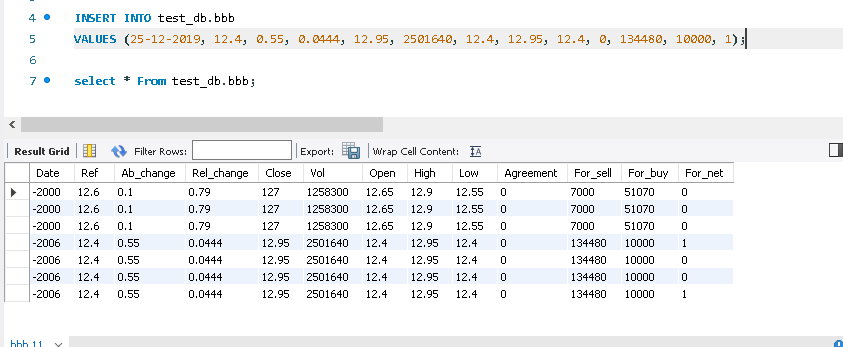

In [123]:
"""INSERT INTO test_db.bbb VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);""" %tuple(df[4:5].values[0])

'INSERT INTO test_db.bbb \nVALUES (25-12-2019, 12.4, 0.55, 0.0444, 12.95, 2501640, 12.4, 12.95, 12.4, 0, 134480, 10000, 0);'